In [1]:
from keras.models import load_model
import os
import sys
import pandas as pd
from PIL import Image
import numpy as np
sys.path.insert(1, '../src')

import preprocess_image

In [2]:
import importlib
importlib.reload(preprocess_image)

<module 'preprocess_image' from '../src/preprocess_image.py'>

In [3]:
import matplotlib.pyplot as plt

## Load Images from Dataset

In [4]:
# data_path = '../data/raw/'
# image_dir = os.path.join(data_path, 'fairface_pad125')

# val_csv = pd.read_csv(os.path.join(data_path, 'fairface_label_val.csv'))

## Predict

In [3]:
gen_model = load_model("../models/gender_classifier.hdf5") 

In [5]:
race_model = load_model("../race_t6-Copy1.hdf5") 

In [6]:
race_biased_model = load_model("../race_biased_v1-Copy1.hdf5")
race_model = load_model("../race_t6-Copy1.hdf5") 

In [115]:
#model.optimizer.get_weights()
#res_model.optimizer

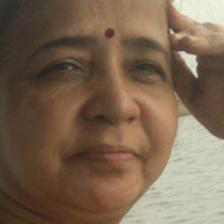

In [9]:
# img_path = os.path.join(image_dir, "train/19.jpg")
# image = Image.open(img_path)
# image


#img_path = os.path.join("../../fairface_data/fairface_pad125", "val/15.jpg")
#img_path = os.path.join("/teams/DSC180A_FA20_A00/a01explainableai/a01capstonegroup03/fairface_pad025/", "val/15.jpg")
img_path = os.path.join("../../fairface_pad025/", "val/40.jpg")
image_open = Image.open(img_path)
image_open

In [9]:
filenames

['run_race.py',
 'training.log',
 'run 2.py',
 'race_t6-Copy1.hdf5',
 'README.md',
 '.gitignore',
 'racial_classification_model.hdf5']

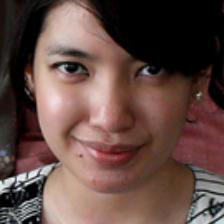

In [146]:
img_path = os.path.join("../../fairface_data/fairface_pad025", "train/17.jpg")
image = Image.open(img_path)
image

In [41]:
img = preprocess_image.detect_face(img_path)
pred = model.predict(img)[0]

if pred[0] > pred[1]:
    gender = "M"
else:
    gender = "F"

print("Prediction: {}\n\nF: {}\nM: {}".format(gender, pred[1], pred[0]))

Prediction: M

F: 0.13688835501670837
M: 0.862277626991272


In [17]:
#gender prediction
img = preprocess_image.detect_face(img_path)
pred = gen_model.predict(img)[0]

if pred[0] > pred[1]:
    gender = "M"
else:
    gender = "F"

print("Prediction: {}\n\nF: {}\nM: {}".format(gender, pred[1], pred[0]))

Prediction: M

F: 0.13688841462135315
M: 0.8622775673866272


In [18]:
img

array([[[[0.02745098, 0.15686275, 0.12156863],
         [0.03529412, 0.15686275, 0.12941176],
         [0.03921569, 0.16078431, 0.12941176],
         ...,
         [0.37647059, 0.27843137, 0.22745098],
         [0.34509804, 0.27058824, 0.21176471],
         [0.29803922, 0.23529412, 0.18039216]],

        [[0.03529412, 0.14117647, 0.1254902 ],
         [0.04313725, 0.15294118, 0.12156863],
         [0.04313725, 0.15294118, 0.12156863],
         ...,
         [0.37647059, 0.25098039, 0.23137255],
         [0.36862745, 0.24313725, 0.22745098],
         [0.34117647, 0.23529412, 0.21176471]],

        [[0.03921569, 0.14117647, 0.12941176],
         [0.04705882, 0.15294118, 0.12156863],
         [0.04705882, 0.15294118, 0.12156863],
         ...,
         [0.37647059, 0.24705882, 0.23137255],
         [0.37254902, 0.23921569, 0.23137255],
         [0.34509804, 0.23529412, 0.21568627]],

        ...,

        [[0.75294118, 0.74901961, 0.75686275],
         [0.78039216, 0.78039216, 0.78823529]

In [ ]:
#Sorry, there were no faces found in '../../fairface_data/fairface_pad025/train/15.jpg'

In [15]:
race_dict = {
        0: 'White', 
        1: 'Black', 
        2: 'East Asian', 
        3: 'Indian', 
        4: 'Middle Eastern',
        5: 'Latino_Hispanic',
        6: 'Southeast Asian'
    }

In [148]:
# race prediction
img = preprocess_image.detect_face(img_path)
pred2 = race_model.predict(img)
pred2

[array([[-0.35605505]], dtype=float32),
 array([[8.8560404e-03, 4.8337053e-05, 1.5434570e-02, 9.1773942e-03,
         1.7511004e-03, 1.2862668e-02, 9.5186985e-01]], dtype=float32),
 array([[0.41201934, 0.5667817 ]], dtype=float32)]

In [149]:
max_ind = list(pred2[1][0]).index(max(pred2[1][0]))
print("Prediction: {}\n\nWhite: {}\nBlack: {}\nEast Asian: {}\nIndian: {}\nMiddle Eastern: {}\nLatino_hispanic: {}\nSoutheast Asian: {}".format(race_dict[max_ind],pred2[1][0][0], pred2[1][0][1],
                                                                                                                                                pred2[1][0][2],pred2[1][0][3],
                                                                                                                                                pred2[1][0][4],pred2[1][0][5],
                                                                                                                                                pred2[1][0][6]))







Prediction: Southeast Asian

White: 0.008856040425598621
Black: 4.8337053158320487e-05
East Asian: 0.01543456967920065
Indian: 0.009177394211292267
Middle Eastern: 0.0017511004116386175
Latino_hispanic: 0.012862668372690678
Southeast Asian: 0.9518698453903198


In [15]:
# import sys
# import os
# import json
# import os.path
# import os
# import cv2


# #from etl import *
# #src/etl.py
# #from features import apply_features


# #from src import training_image_classifier
# from grad_cam_model import run_models
# from grad_cam import *



In [4]:
gen_model.summary()

Model: "face_net"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 198, 198, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 198, 198, 16)      448       
_________________________________________________________________
activation (Activation)      (None, 198, 198, 16)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 198, 198, 16)      64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 66, 66, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 66, 66, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 66, 66, 32)        464

In [5]:
gen_model.layers

In [7]:
pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [10]:
#new implementation: https://www.pyimagesearch.com/2020/03/09/grad-cam-visualize-class-activation-maps-with-keras-tensorflow-and-deep-learning/

In [4]:
# import the necessary packages
from tensorflow.keras.models import Model
import tensorflow as tf
import numpy as np
import cv2
class GradCAM:
    def __init__(self, model, classIdx, layerName=None):
        # store the model, the class index used to measure the class
        # activation map, and the layer to be used when visualizing
        # the class activation map
        self.model = model
        self.classIdx = classIdx
        self.layerName = layerName
        # if the layer name is None, attempt to automatically find
        # the target output layer
        if self.layerName is None:
            self.layerName = self.find_target_layer()
            
    def find_target_layer(self):
        # attempt to find the final convolutional layer in the network
        # by looping over the layers of the network in reverse order
        for layer in reversed(self.model.layers):
            # check to see if the layer has a 4D output
            if len(layer.output_shape) == 4:
                print(layer.name)
                return layer.name
        # otherwise, we could not find a 4D layer so the GradCAM
        # algorithm cannot be applied
        raise ValueError("Could not find 4D layer. Cannot apply GradCAM.")
        
    def compute_heatmap(self, image, eps=1e-8):
        # construct our gradient model by supplying (1) the inputs
        # to our pre-trained model, (2) the output of the (presumably)
        # final 4D layer in the network, and (3) the output of the
        # softmax activations from the model
        gradModel = Model(
            inputs=[self.model.inputs],
            outputs=[self.model.get_layer(self.layerName).output,
                self.model.output])
        
        # record operations for automatic differentiation
        with tf.GradientTape() as tape:
            # cast the image tensor to a float-32 data type, pass the
            # image through the gradient model, and grab the loss
            # associated with the specific class index
            inputs = tf.cast(image, tf.float32)
            (convOutputs, predictions) = gradModel(inputs)
            loss = predictions[:, self.classIdx]
        # use automatic differentiation to compute the gradients
        grads = tape.gradient(loss, convOutputs)
        
        # compute the guided gradients
        castConvOutputs = tf.cast(convOutputs > 0, "float32")
        castGrads = tf.cast(grads > 0, "float32")
        guidedGrads = castConvOutputs * castGrads * grads
        # the convolution and guided gradients have a batch dimension
        # (which we don't need) so let's grab the volume itself and
        # discard the batch
        convOutputs = convOutputs[0]
        guidedGrads = guidedGrads[0]
        
        
        # compute the average of the gradient values, and using them
        # as weights, compute the ponderation of the filters with
        # respect to the weights
        weights = tf.reduce_mean(guidedGrads, axis=(0, 1))
        cam = tf.reduce_sum(tf.multiply(weights, convOutputs), axis=-1)
        
        # grab the spatial dimensions of the input image and resize
        # the output class activation map to match the input image
        # dimensions
        (w, h) = (image.shape[2], image.shape[1])
        heatmap = cv2.resize(cam.numpy(), (w, h))
        #heatmap2 = cam.numpy().reshape(w,h)
       
        # normalize the heatmap such that all values lie in the range
        # [0, 1], scale the resulting values to the range [0, 255],
        # and then convert to an unsigned 8-bit integer
        numer = heatmap - np.min(heatmap)
        denom = (heatmap.max() - heatmap.min()) + eps
        heatmap = numer / denom
        heatmap = (heatmap * 255).astype("uint8")
        # return the resulting heatmap to the calling function
        
        #Return to BGR [0..255] from the preprocessed image
        image = image[0, :]
        image -= np.min(image)
        image = np.minimum(image, 255)

        cam = cv2.applyColorMap(np.uint8(255*heatmap), cv2.COLORMAP_JET)
        cam = np.float32(cam) + np.float32(image)
        cam = 255 * cam / np.max(cam)
        return np.uint8(cam), heatmap

        #return heatmap
    
    def overlay_heatmap(self, heatmap, image, alpha=0.5,
        colormap=cv2.COLORMAP_JET):
        # apply the supplied color map to the heatmap and then
        # overlay the heatmap on the input image
        heatmap = cv2.applyColorMap(heatmap, colormap)
        output = cv2.addWeighted(image, alpha, heatmap, 1 - alpha, 0)
        # return a 2-tuple of the color mapped heatmap and the output,
        # overlaid image
        return (heatmap, output)

In [6]:
race_biased_model = load_model("../race_biased_v1-Copy1.hdf5")
race_model = load_model("../race_t6-Copy1.hdf5") 

ResourceExhaustedError: OOM when allocating tensor with shape[3,3,128,128] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc [Op:Add]

In [ ]:
img_num = 323
img_path = os.path.join("../../a01capstonegroup03/fairface_pad025/", "val/" + str(img_num) + ".jpg")
image_open = Image.open(img_path)
image_open

In [7]:
from tensorflow.keras.applications import resnet_v2

In [ ]:
#RACE
# load the original image from disk (in OpenCV format) and then
# resize the image to its target dimensions
orig = plt.imread(img_path) #RGB
resized = cv2.resize(orig, (224, 224)).reshape(-1,224,224,3)
#resized = orig.reshape(-1,224,224,3)

#img_face = preprocess_image.detect_face(img_path)

img_face = resnet_v2.preprocess_input(resized)

In [40]:
orig = plt.imread(img_path)
orig2 = cv2.imread(img_path)

In [157]:
cv2.cvtColor(orig2, cv2.COLOR_BGR2RGB)

array([[[107,  17,  17],
        [101,  15,  14],
        [ 93,  13,  12],
        ...,
        [  4,   5,   0],
        [  3,   4,   0],
        [  2,   3,   0]],

       [[109,  17,  18],
        [103,  15,  14],
        [ 94,  13,  12],
        ...,
        [  4,   5,   0],
        [  3,   4,   0],
        [  2,   3,   0]],

       [[112,  18,  18],
        [106,  16,  15],
        [ 98,  14,  12],
        ...,
        [  4,   5,   0],
        [  3,   4,   0],
        [  2,   3,   0]],

       ...,

       [[ 69,  32,  24],
        [ 67,  30,  22],
        [ 64,  30,  21],
        ...,
        [ 71,  36,  17],
        [ 72,  37,  18],
        [ 72,  37,  18]],

       [[ 69,  32,  23],
        [ 67,  30,  21],
        [ 63,  29,  19],
        ...,
        [ 75,  38,  20],
        [ 76,  39,  21],
        [ 76,  39,  21]],

       [[ 69,  32,  23],
        [ 67,  30,  21],
        [ 63,  29,  19],
        ...,
        [ 78,  41,  23],
        [ 79,  42,  24],
        [ 79,  42,  24]]

In [ ]:
#image = cv2.resize(image, (cnn_input_size, cnn_input_size), interpolation = cv2.INTER_NEAREST)

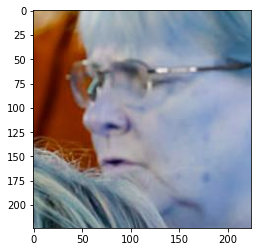

In [44]:
plt.imshow(orig2)

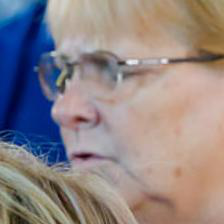

In [43]:
#resized = orig.reshape(-1, 224,224,3)
Image.fromarray(resized.squeeze())

In [47]:
#unbiased race predictions
pred2 = race_model.predict(img_face)[0]
predicted_class = np.argmax(pred2)
predicted_class

6

In [48]:
#biased race
biased_pred2 = race_biased_model.predict(img_face)[0]
predicted_class2 = np.argmax(biased_pred2)
predicted_class2

6

In [49]:
race_dict = {
        6: 'White', 
        0: 'Black', 
        1: 'East Asian', 
        2: 'Indian', 
        4: 'Middle Eastern',
        3: 'Latino_Hispanic',
        5: 'Southeast Asian'
}

In [50]:
#race prediction decode
max_ind = list(pred2).index(max(pred2))
print("Prediction: {}\n\nWhite: {}\nBlack: {}\nEast Asian: {}\nIndian: {}\nMiddle Eastern: {}\nLatino_hispanic: {}\nSoutheast Asian: {}".format(race_dict[max_ind],pred2[6], pred2[0],
                                                                                                                                                pred2[1],pred2[2],
                                                                                                                                                pred2[4],pred2[3],
                                                                                                                                                pred2[5]))

Prediction: White

White: 0.9970877766609192
Black: 2.232913175248541e-06
East Asian: 7.716039363003802e-06
Indian: 2.7557776775211096e-05
Middle Eastern: 0.001538528362289071
Latino_hispanic: 0.001326008583419025
Southeast Asian: 1.0299356290488504e-05


In [51]:
#biased race predict
max_ind = list(biased_pred2).index(max(biased_pred2))
print("Prediction: {}\n\nWhite: {}\nBlack: {}\nEast Asian: {}\nIndian: {}\nMiddle Eastern: {}\nLatino_hispanic: {}\nSoutheast Asian: {}".format(race_dict[max_ind],biased_pred2[6], biased_pred2[0],
                                                                                                                                                biased_pred2[1],biased_pred2[2],
                                                                                                                                                biased_pred2[4],biased_pred2[3],
                                                                                                                                                biased_pred2[5]))

Prediction: White

White: 0.9242662191390991
Black: 0.013724423944950104
East Asian: 0.005808721296489239
Indian: 0.0006687451968900859
Middle Eastern: 0.010438766330480576
Latino_hispanic: 0.04045962914824486
Southeast Asian: 0.004633444361388683


In [ ]:
# ## gender decode
# if predictions[0] > predictions[1]:
#     gender = "M"
# else:
#     gender = "F"

# print("Prediction: {}\n\nF: {}\nM: {}".format(gender, predictions[1], predictions[0]))

In [52]:
#RACE
cam = GradCAM(race_model, predicted_class)
heatmap = cam.compute_heatmap(img_face)
# resize the resulting heatmap to the original input image dimensions
# and then overlay heatmap on top of the image
resized = cv2.resize(orig, (198, 198))
heatmap = cv2.resize(heatmap, (orig.shape[1], orig.shape[0]))
(heatmap, output) = cam.overlay_heatmap(heatmap, orig, alpha=0.5)
cv2.imwrite("test_gradcam_" + str(img_num) + ".jpg", output)
#cv2.imwrite("test_heatmap_115.jpg", heatmap)

True

In [53]:
#cv2.imwrite("test_heatmap_115.jpg", heatmap)

In [54]:
#biased grad-cam
#RACE
biased_cam = GradCAM(race_biased_model, predicted_class2)
biased_heatmap = biased_cam.compute_heatmap(img_face)
resized = cv2.resize(orig, (198, 198))
biased_heatmap = cv2.resize(biased_heatmap, (orig.shape[1], orig.shape[0]))
(biased_heatmap, biased_output) = biased_cam.overlay_heatmap(biased_heatmap, orig, alpha=0.5)
cv2.imwrite("test_biased_gradcam_" + str(img_num) + ".jpg", biased_output)
#cv2.imwrite("test_biased_heatmap_115.jpg", heatmap)

True

In [38]:
img_num

15

In [180]:
def create_stats(model, generator, target, label_path, mapping_path, save_path):
    
    if not os.path.exists(save_path):
        os.mkdir(save_path)
    
    label_df = pd.read_csv(label_path)
    with open(mapping_path) as f:
        target_map = json.load(f)
    f.close()
    
    pred = model.predict(generator).argmax(axis = 1)
    ground_truth = label_df[target].replace(target_map).values
    cr = classification_report(ground_truth, pred, target_names = target_map.keys())
    
    with open(os.path.join(save_path, "class_report.txt"), "w") as f:
        f.write(cr)
    f.close()
    
    cr = classification_report(ground_truth, pred, target_names = target_map.keys(), output_dict = True)
    
    result_df = pd.DataFrame(cr).T.iloc[:len(target_map), :]
    result_df = result_df.reset_index().rename(columns= {"index": "category"})

    cm = confusion_matrix(ground_truth, pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    acc = cm.diagonal()
    result_df["accuracy"] = acc
    
    stat_names = ["precision", "recall", "f1-score", "accuracy", "support"]
    
    for name in stat_names:
        save_dir = os.path.join(save_path, name + "_barplot")
        plt.figure(figsize = (12,8))
        sns.barplot(x = "category", y= name, data= result_df,linewidth=2.5, 
                    facecolor=(1, 1, 1, 0), edgecolor="0")
        plt.title("{} across {}".format(name, target), fontsize = 20)
        plt.xlabel(target, fontsize = 16)
        plt.ylabel(name, fontsize= 16)
        plt.savefig(save_dir) 

In [ ]:
generator = create_generator(label_path,
                                     image_path,
                                     target,
                                     224,
                                     128,
                                     mapping_path,
                                     resnet_v2.preprocess_input, ##change this
                                     is_training = False)

In [25]:
pip install imutils

Defaulting to user installation because normal site-packages is not writeable
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25860 sha256=582e777441784451b0adeda1dcbb9c05956778fbed940459eae5541d9b8dcd36
  Stored in directory: /tmp/xdg-cache/pip/wheels/86/d7/0a/4923351ed1cec5d5e24c1eaf8905567b02a0343b24aa873df2
Successfully built imutils
Note: you may need to restart the kernel to use updated packages.


In [ ]:
#Grad-CAM statistics

In [4]:
val_df = pd.read_csv("../../a01capstonegroup03/fairface_label_val.csv")
val_df.head()

,file,age,gender,race,service_test
0,val/1.jpg,3-9,Male,East Asian,False
1,val/2.jpg,50-59,Female,East Asian,True
2,val/3.jpg,30-39,Male,White,True
3,val/4.jpg,20-29,Female,Latino_Hispanic,True
4,val/5.jpg,20-29,Male,Southeast Asian,False


In [9]:
val_df.loc[val_df["file"] == "val/323.jpg"]

,file,age,gender,race,service_test
322,val/323.jpg,50-59,Female,White,False


In [5]:
val_df = pd.read_csv("~/fairface_data/fairface_label_val.csv")
val_df.head()

,file,age,gender,race,service_test
0,val/1.jpg,3-9,Male,East Asian,False
1,val/2.jpg,50-59,Female,East Asian,True
2,val/3.jpg,30-39,Male,White,True
3,val/4.jpg,20-29,Female,Latino_Hispanic,True
4,val/5.jpg,20-29,Male,Southeast Asian,False


In [6]:
val_df["race"].unique()

array(['East Asian', 'White', 'Latino_Hispanic', 'Southeast Asian',
       'Black', 'Indian', 'Middle Eastern'], dtype=object)

In [7]:
val_df[val_df["race"] == "East Asian"][:10]

,file,age,gender,race,service_test
0,val/1.jpg,3-9,Male,East Asian,False
1,val/2.jpg,50-59,Female,East Asian,True
7,val/8.jpg,3-9,Male,East Asian,False
10,val/11.jpg,more than 70,Female,East Asian,True
11,val/12.jpg,50-59,Female,East Asian,True
16,val/17.jpg,30-39,Male,East Asian,False
20,val/21.jpg,20-29,Male,East Asian,True
23,val/24.jpg,10-19,Female,East Asian,False
28,val/29.jpg,3-9,Female,East Asian,False
33,val/34.jpg,3-9,Male,East Asian,False


In [82]:
east_asian_val = val_df[val_df["race"] == "East Asian"]
white_val = val_df[val_df["race"] == "White"]
hisp_val = val_df[val_df["race"] == "Latino_Hispanic"]
south_asian_val = val_df[val_df["race"] == "Southeast Asian"]
black_val = val_df[val_df["race"] == "Black"]
indian_val = val_df[val_df["race"] == "Indian"]
middle_eastern_val = val_df[val_df["race"] == "Middle Eastern"]
race_val_dfs = [east_asian_val, white_val, hisp_val, south_asian_val, black_val, indian_val, middle_eastern_val]

In [97]:
for i in east_asian_val.iterrows():
    l = i
    break
    
l[1]["file"]

'val/1.jpg'

In [118]:
imlist = [heatmap, heatmap]
arr= np.zeros((448,448,3),np.float)
N = len(imlist)
for im in imlist:
    imarr=np.array(im,dtype=np.float)
    arr=arr+imarr/N

# Round values in array and cast as 8-bit integer
arr=np.array(np.round(arr),dtype=np.uint8)
arr

array([[[200,   0,   0],
        [200,   0,   0],
        [200,   0,   0],
        ...,
        [255,  40,   0],
        [255,  40,   0],
        [255,  40,   0]],

       [[200,   0,   0],
        [200,   0,   0],
        [200,   0,   0],
        ...,
        [255,  40,   0],
        [255,  40,   0],
        [255,  40,   0]],

       [[200,   0,   0],
        [200,   0,   0],
        [200,   0,   0],
        ...,
        [255,  40,   0],
        [255,  40,   0],
        [255,  40,   0]],

       ...,

       [[128,   0,   0],
        [128,   0,   0],
        [128,   0,   0],
        ...,
        [255, 108,   0],
        [255, 108,   0],
        [255, 108,   0]],

       [[128,   0,   0],
        [128,   0,   0],
        [128,   0,   0],
        ...,
        [255, 108,   0],
        [255, 108,   0],
        [255, 108,   0]],

       [[128,   0,   0],
        [128,   0,   0],
        [128,   0,   0],
        ...,
        [255, 108,   0],
        [255, 108,   0],
        [255, 108,   0]]

In [81]:
def race_prediction():
    pred2 = race_model.predict(img_face)[0]
    race_dict = {
        0: 'White', 
        1: 'Black', 
        2: 'East Asian', 
        3: 'Indian', 
        4: 'Middle Eastern',
        5: 'Latino_Hispanic',
        6: 'Southeast Asian'
    }
    max_ind = list(pred2).index(max(pred2))
    return race_dict[max_ind]

In [9]:
#generate average heatmap for a specific race
def generate_avg_heatmap(race, val_df):
    race_val_df = val_df[val_df["race"] == race][:5]
    heatmaps = []
    for row in race_val_df.iterrows():
        img_file = row[1]["file"]
        img_path = "../../fairface_data/fairface_pad125/" + img_file
        
        orig = cv2.imread(img_path)
        print(img_path)
        #resized = cv2.resize(orig, (224, 224))
        
        img_face = preprocess_image.detect_face(img_path)
        race_pred = race_model.predict(img_face)[0]
        predicted_class = np.argmax(race_pred[0])
        cam = GradCAM(race_model, predicted_class)
        heatmap = cam.compute_heatmap(img_face)
        
        resized = cv2.resize(orig, (198, 198))
        heatmap = cv2.resize(heatmap, (orig.shape[1], orig.shape[0]))
        (heatmap, output) = cam.overlay_heatmap(heatmap, orig, alpha=0.5)
    
        heatmaps.append(heatmap)
        
    
    arr= np.zeros((448,448,3),np.float)
    N = len(heatmaps)
    for im in heatmaps:
        imarr=np.array(im,dtype=np.float)
#         print(arr.shape)
#         print(imarr.shape)
        arr=arr+imarr/N

    # Round values in array and cast as 8-bit integer
    arr=np.array(np.round(arr),dtype=np.uint8)
    cv2.imwrite("race_"+ race + "_heatmap.jpg", arr)
        
    
        

In [ ]:
'../../fairface_data/fairface_pad125/val/15.jpg'

In [10]:
generate_avg_heatmap("Indian", val_df)

../../fairface_data/fairface_pad125/val/13.jpg
../../fairface_data/fairface_pad125/val/14.jpg
../../fairface_data/fairface_pad125/val/31.jpg
../../fairface_data/fairface_pad125/val/32.jpg
../../fairface_data/fairface_pad125/val/40.jpg


In [132]:
img_path2

'../../fairface_data/fairface_pad125/val/15.jpg'

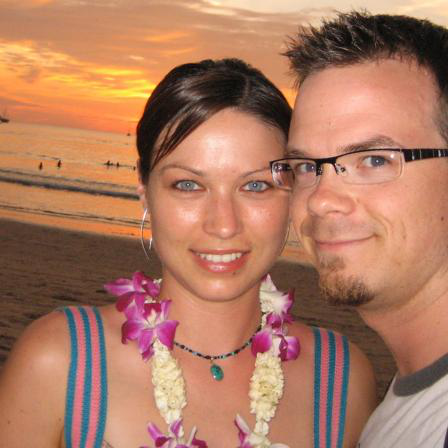

In [152]:
# img_path = os.path.join("../../fairface_data/fairface_pad125", "val/15.jpg")
#img_path2 = os.path.join("../../fairface_data/fairface_pad125", "val/15.jpg")
image_open2 = Image.open('../../fairface_data/fairface_pad125/val/50.jpg')
image_open2

In [155]:
val_df[val_df["file"] == "val/50.jpg"]

,file,age,gender,race,service_test
49,val/50.jpg,20-29,Female,White,True


In [ ]:
img_face = preprocess_image.detect_face(img_path)
pred2 = race_model.predict(img_face)[0]
cam = GradCAM(race_model, predicted_class)
heatmap = cam.compute_heatmap(img_face)

# resize the resulting heatmap to the original input image dimensions
# and then overlay heatmap on top of the image
resized = cv2.resize(orig, (198, 198))
heatmap = cv2.resize(heatmap, (orig.shape[1], orig.shape[0]))
(heatmap, output) = cam.overlay_heatmap(heatmap, orig, alpha=0.5)

cv2.imwrite("race3_heatmap.jpg", heatmap)